In [6]:
from google.colab import files
uploaded = files.upload()

Saving DP_LIVE_06092023162930983.csv to DP_LIVE_06092023162930983.csv


In [7]:
import pandas as pd

# имя загруженного файла
file_name = "DP_LIVE_06092023162930983.csv"

# чтения файла CSV
df = pd.read_csv(file_name)

# первые несколько строк данных
print(df.head())

  LOCATION  INDICATOR SUBJECT  MEASURE FREQUENCY  TIME     Value Flag Codes
0      AUS  HEALTHEXP     TOT  USD_CAP         A  2018  5190.886        NaN
1      AUS  HEALTHEXP     TOT  USD_CAP         A  2019  5126.653        NaN
2      AUS  HEALTHEXP     TOT  USD_CAP         A  2020  5692.402        NaN
3      AUS  HEALTHEXP     TOT  USD_CAP         A  2021  6225.535          E
4      AUS  HEALTHEXP     TOT  USD_CAP         A  2022  6596.466          E


In [10]:
import pandas as pd
# сортирую его по столбцу "Value" по убыванию
df_sorted = df.sort_values(by='Value', ascending=False)

print(df_sorted.head())


    LOCATION  INDICATOR     SUBJECT  MEASURE FREQUENCY  TIME      Value  \
149      USA  HEALTHEXP         TOT  USD_CAP         A  2022  12555.264   
148      USA  HEALTHEXP         TOT  USD_CAP         A  2021  12196.966   
147      USA  HEALTHEXP         TOT  USD_CAP         A  2020  11915.945   
146      USA  HEALTHEXP         TOT  USD_CAP         A  2019  10852.838   
518      USA  HEALTHEXP  COMPULSORY  USD_CAP         A  2022  10643.652   

    Flag Codes  
149          E  
148        NaN  
147        NaN  
146        NaN  
518          E  


In [11]:
df_sorted

LOCATION  INDICATOR     SUBJECT  MEASURE FREQUENCY  TIME      Value  \
149      USA  HEALTHEXP         TOT  USD_CAP         A  2022  12555.264   
148      USA  HEALTHEXP         TOT  USD_CAP         A  2021  12196.966   
147      USA  HEALTHEXP         TOT  USD_CAP         A  2020  11915.945   
146      USA  HEALTHEXP         TOT  USD_CAP         A  2019  10852.838   
518      USA  HEALTHEXP  COMPULSORY  USD_CAP         A  2022  10643.652   
..       ...        ...         ...      ...       ...   ...        ...   
579      IND  HEALTHEXP   VOLUNTARY  USD_CAP         A  2018    134.711   
581      IND  HEALTHEXP   VOLUNTARY  USD_CAP         A  2020    132.182   
578      IND  HEALTHEXP  COMPULSORY  USD_CAP         A  2020     78.469   
577      IND  HEALTHEXP  COMPULSORY  USD_CAP         A  2019     74.255   
576      IND  HEALTHEXP  COMPULSORY  USD_CAP         A  2018     70.754   

    Flag Codes  
149          E  
148        NaN  
147        NaN  
146        NaN  
518          E  
..         ...  
579        NaN  
581        NaN  
578        NaN  
577        NaN  
576        NaN  

[690 rows x 8 columns]

In [12]:
# Средние расходы на здравоохранение по годам
average_by_year = df.groupby('TIME')['Value'].mean()

# Средние расходы на здравоохранение по странам
average_by_country = df.groupby('LOCATION')['Value'].mean()


In [13]:
# Суммарные расходы на здравоохранение по годам
total_by_year = df.groupby('TIME')['Value'].sum()

# Общие суммарные расходы на здравоохранение для всех стран
total_for_all_countries = df['Value'].sum()


In [14]:
# Страна с самыми высокими расходами
highest_spending_country = df[df['Value'] == df['Value'].max()]

# Страна с самыми низкими расходами
lowest_spending_country = df[df['Value'] == df['Value'].min()]


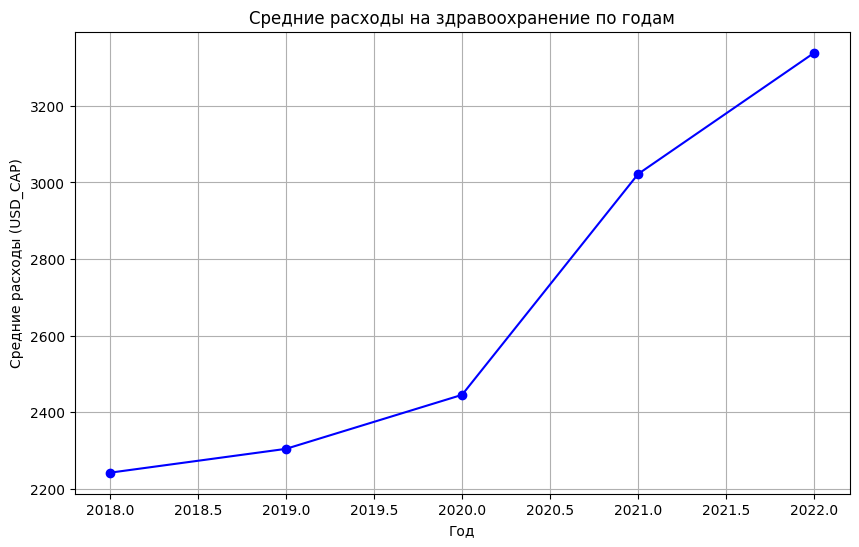

In [15]:
import matplotlib.pyplot as plt

average_by_year = df.groupby('TIME')['Value'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_by_year.index, average_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Средние расходы на здравоохранение по годам')
plt.xlabel('Год')
plt.ylabel('Средние расходы (USD_CAP)')
plt.grid(True)
plt.show()


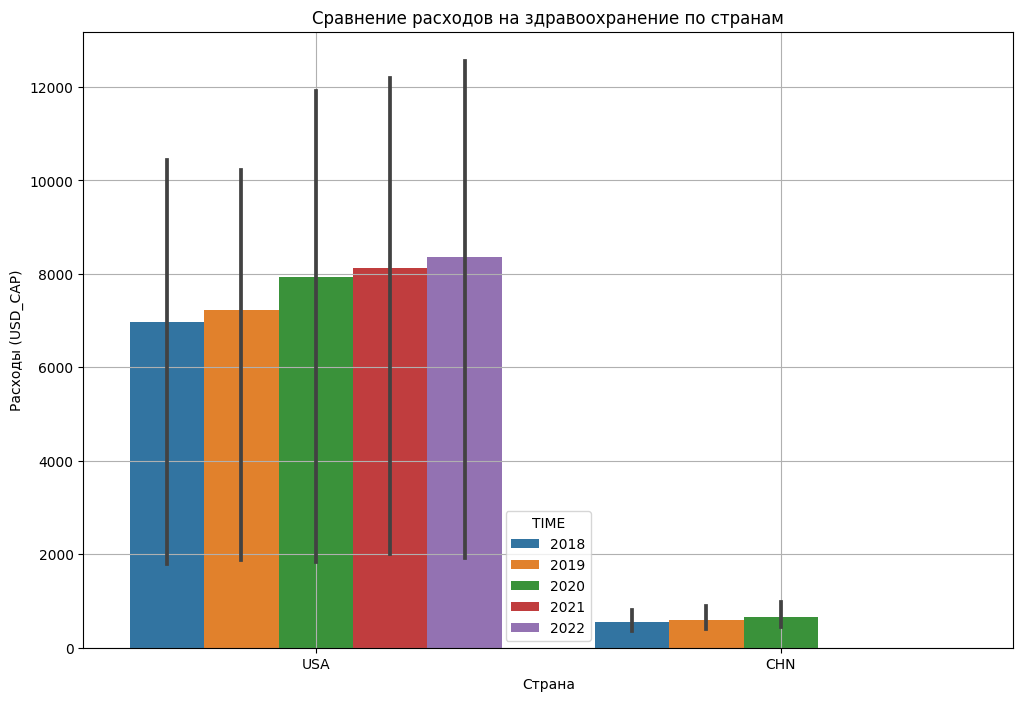

In [17]:
import seaborn as sns

# страны для сравнения (США, Китай и Россию)
selected_countries = df[df['LOCATION'].isin(['USA', 'CHN', 'RUS'])]

plt.figure(figsize=(12, 8))
sns.barplot(x='LOCATION', y='Value', hue='TIME', data=selected_countries)
plt.title('Сравнение расходов на здравоохранение по странам')
plt.xlabel('Страна')
plt.ylabel('Расходы (USD_CAP)')
plt.grid(True)
plt.show()


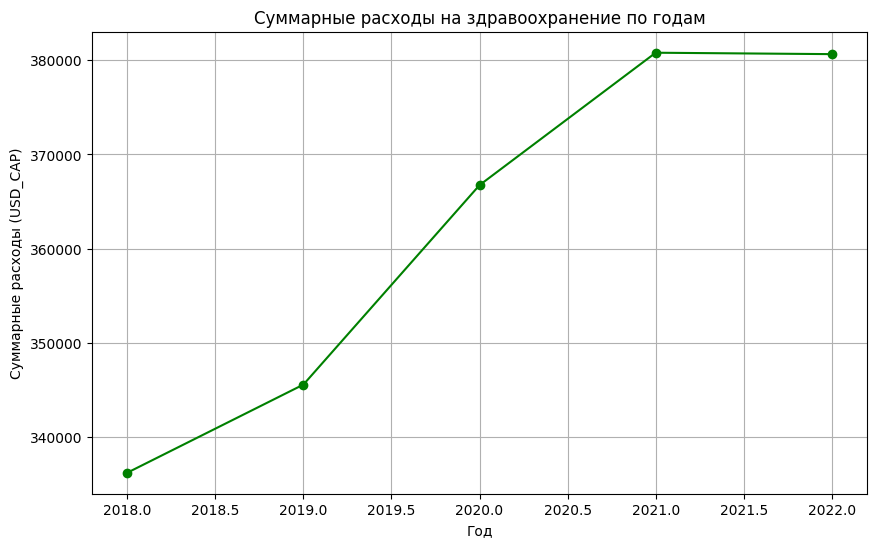

In [18]:
total_by_year = df.groupby('TIME')['Value'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_by_year.index, total_by_year.values, marker='o', linestyle='-', color='g')
plt.title('Суммарные расходы на здравоохранение по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные расходы (USD_CAP)')
plt.grid(True)
plt.show()


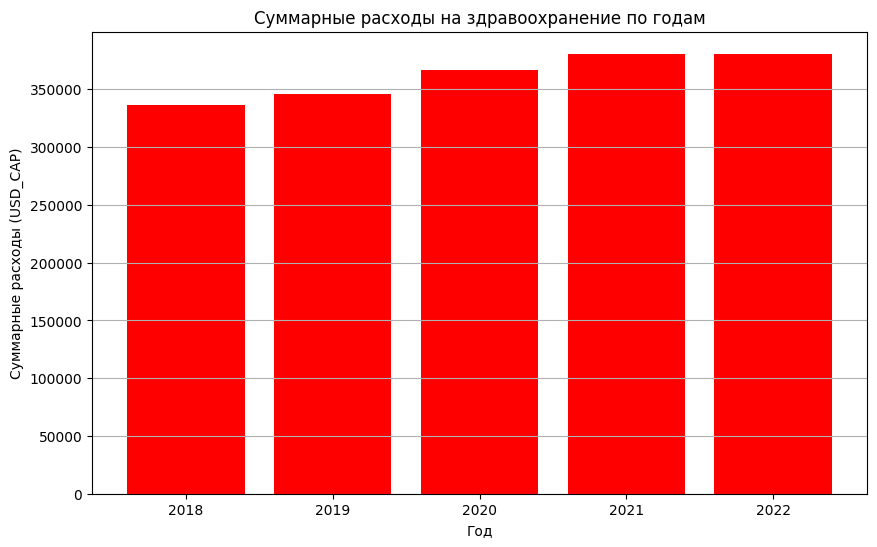

In [20]:
total_by_year = df.groupby('TIME')['Value'].sum()
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='red')
plt.title('Суммарные расходы на здравоохранение по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные расходы (USD_CAP)')
plt.grid(axis='y')
plt.show()


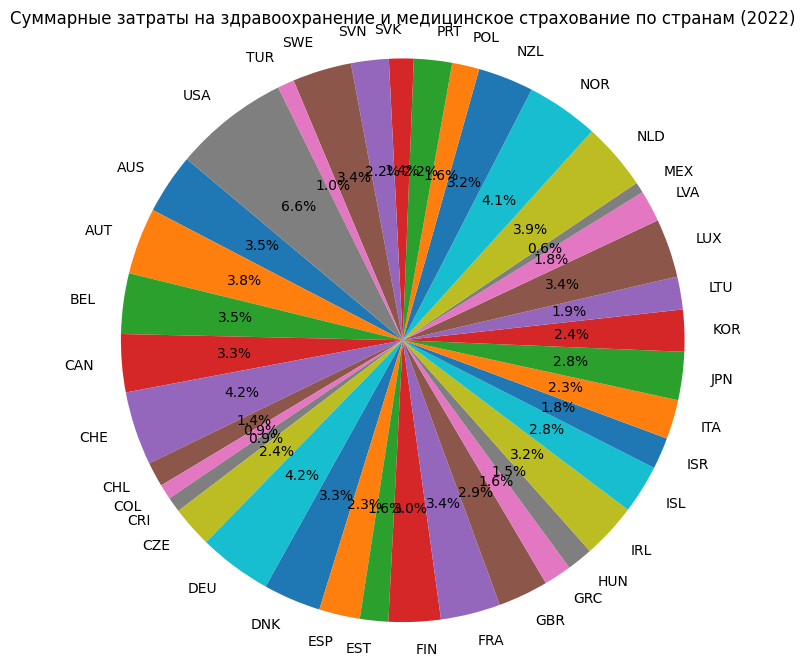

In [25]:
import matplotlib.pyplot as plt

# данные только за 2022 год
year = 2022
df_2022 = df[df['TIME'] == year]

# данные по странам и суммируем затраты на здравоохранение и медицинское страхование
total_spending_by_country = df_2022.groupby('LOCATION')['Value'].sum()

#круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(total_spending_by_country, labels=total_spending_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Суммарные затраты на здравоохранение и медицинское страхование по странам ({year})')
plt.axis('equal')  # Делаем круговую диаграмму круглой
plt.show()


In [26]:
from google.colab import files
uploaded = files.upload()

Saving custom.geo.json to custom.geo.json


In [27]:
import geopandas as gpd

# Загрузка географических данных
gdf = gpd.read_file("custom.geo.json")

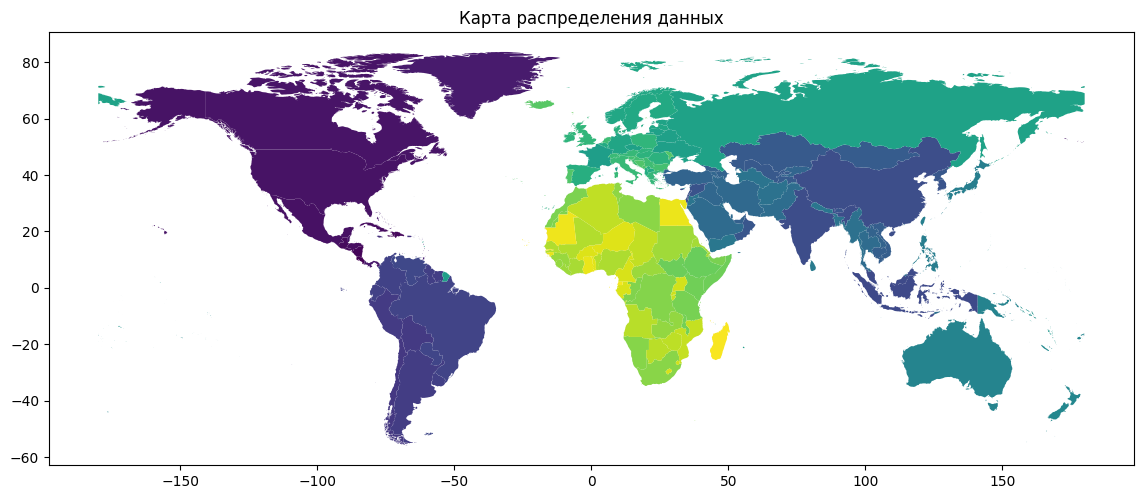

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(14, 10))

gdf.plot(ax=ax, cmap='viridis', legend=True)

ax.set_title("Карта распределения данных")

plt.show()
